In [242]:
#Importing libraries
import tensorflow as tf
import pandas as pd
pd.options.display.float_format="{:,.2f}".format

In [90]:
df=pd.read_csv("sleep_health_lifestyle.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Feature Engineering

In [91]:
df.drop(columns=["Person ID"],inplace=True)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [92]:
df["Age_range"]=pd.cut(x=df['Age'], bins=[20, 30, 40,50 
                                        , 60])

df.sample(5)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age_range
245,Female,44,Teacher,6.5,7,45,4,Overweight,135/90,65,6000,Insomnia,"(40, 50]"
158,Male,39,Lawyer,7.2,8,60,5,Normal,130/85,68,8000,None,"(30, 40]"
32,Female,31,Nurse,7.9,8,75,4,Normal Weight,117/76,69,6800,None,"(30, 40]"
136,Female,38,Accountant,7.1,8,60,4,Normal,115/75,68,7000,None,"(30, 40]"
160,Male,39,Lawyer,7.2,8,60,5,Normal,130/85,68,8000,None,"(30, 40]"


In [93]:
df["Heart Rate Range"]=pd.cut(df["Heart Rate"],bins=[60,70,80,90])

df.sample(5)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age_range,Heart Rate Range
178,Male,42,Lawyer,7.8,8,90,5,Normal,130/85,70,8000,None,"(40, 50]","(60, 70]"
113,Male,37,Lawyer,7.4,8,60,5,Normal,130/85,68,8000,None,"(30, 40]","(60, 70]"
267,Female,49,Nurse,6.2,6,90,8,Overweight,140/95,75,10000,None,"(40, 50]","(70, 80]"
38,Male,31,Doctor,7.6,7,75,6,Normal,120/80,70,8000,None,"(30, 40]","(60, 70]"
225,Male,44,Salesperson,6.3,6,45,7,Overweight,130/85,72,6000,Insomnia,"(40, 50]","(70, 80]"


In [94]:
df["Blood Pressure Systolic"]=df["Blood Pressure"].str[:3].astype("float")

In [95]:
df["Blood Pressure Range"]=pd.cut(df["Blood Pressure Systolic"],bins=[110,120,130,140])
df.sample(5)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age_range,Heart Rate Range,Blood Pressure Systolic,Blood Pressure Range
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,"(50, 60]","(60, 70]",140.0,"(130, 140]"
278,Female,50,Nurse,6.1,6,90,8,Overweight,140/95,75,10000,Insomnia,"(40, 50]","(70, 80]",140.0,"(130, 140]"
120,Female,37,Accountant,7.2,8,60,4,Normal,115/75,68,7000,None,"(30, 40]","(60, 70]",115.0,"(110, 120]"
256,Female,45,Teacher,6.6,7,45,4,Overweight,135/90,65,6000,Insomnia,"(40, 50]","(60, 70]",135.0,"(130, 140]"
73,Male,33,Doctor,6.1,6,30,8,Normal,125/80,72,5000,None,"(30, 40]","(70, 80]",125.0,"(120, 130]"


In [96]:
df["Physical Activity Level Range"]=pd.cut(df["Physical Activity Level"],bins=[0,30,60,90])
df.sample(5)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age_range,Heart Rate Range,Blood Pressure Systolic,Blood Pressure Range,Physical Activity Level Range
68,Female,33,Scientist,6.2,6,50,6,Overweight,128/85,76,5500,None,"(30, 40]","(70, 80]",128.0,"(120, 130]","(30, 60]"
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,"(20, 30]","(80, 90]",140.0,"(130, 140]","(0, 30]"
95,Female,36,Accountant,7.1,8,60,4,Normal,115/75,68,7000,None,"(30, 40]","(60, 70]",115.0,"(110, 120]","(30, 60]"
83,Male,35,Teacher,6.7,7,40,5,Overweight,128/84,70,5600,None,"(30, 40]","(60, 70]",128.0,"(120, 130]","(30, 60]"
30,Female,30,Nurse,6.4,5,35,7,Normal Weight,130/86,78,4100,Sleep Apnea,"(20, 30]","(70, 80]",130.0,"(120, 130]","(30, 60]"


In [97]:
df["Daily steps interval"]=pd.cut(df["Daily Steps"],bins=[2000,4000,6000,8000,10000])
df.sample(5)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age_range,Heart Rate Range,Blood Pressure Systolic,Blood Pressure Range,Physical Activity Level Range,Daily steps interval
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,"(20, 30]","(80, 90]",140.0,"(130, 140]","(0, 30]","(2000, 4000]"
247,Male,44,Engineer,6.8,7,45,7,Overweight,130/85,78,5000,Insomnia,"(40, 50]","(70, 80]",130.0,"(120, 130]","(30, 60]","(4000, 6000]"
178,Male,42,Lawyer,7.8,8,90,5,Normal,130/85,70,8000,None,"(40, 50]","(60, 70]",130.0,"(120, 130]","(60, 90]","(6000, 8000]"
163,Male,40,Lawyer,7.9,8,90,5,Normal,130/85,68,8000,None,"(30, 40]","(60, 70]",130.0,"(120, 130]","(60, 90]","(6000, 8000]"
52,Male,32,Doctor,6.0,6,30,8,Normal,125/80,72,5000,None,"(30, 40]","(70, 80]",125.0,"(120, 130]","(0, 30]","(4000, 6000]"


In [98]:
## Dropping columns that are not needed for the rest of the analysis
df.drop(columns=["Age","Physical Activity Level","Blood Pressure","Heart Rate","Daily Steps","Blood Pressure Systolic"],inplace=True)
df.sample(5)

,Gender,Occupation,Sleep Duration,Quality of Sleep,Stress Level,BMI Category,Sleep Disorder,Age_range,Heart Rate Range,Blood Pressure Range,Physical Activity Level Range,Daily steps interval
1,Male,Doctor,6.2,6,8,Normal,None,"(20, 30]","(70, 80]","(120, 130]","(30, 60]","(8000, 10000]"
167,Male,Lawyer,7.1,7,6,Overweight,None,"(40, 50]","(70, 80]","(120, 130]","(30, 60]","(4000, 6000]"
349,Female,Nurse,8.1,9,3,Overweight,Sleep Apnea,"(50, 60]","(60, 70]","(130, 140]","(60, 90]","(6000, 8000]"
253,Female,Teacher,6.5,7,4,Overweight,Insomnia,"(40, 50]","(60, 70]","(130, 140]","(30, 60]","(4000, 6000]"
235,Male,Salesperson,6.3,6,7,Overweight,Insomnia,"(40, 50]","(70, 80]","(120, 130]","(30, 60]","(4000, 6000]"


In [99]:
df["Sleep Disorder"]=df["Sleep Disorder"].map({"None":0,"Insomnia":1,"Sleep Apnea":2})
df.sample(5)

,Gender,Occupation,Sleep Duration,Quality of Sleep,Stress Level,BMI Category,Sleep Disorder,Age_range,Heart Rate Range,Blood Pressure Range,Physical Activity Level Range,Daily steps interval
274,Female,Nurse,6.2,6,8,Overweight,2,"(40, 50]","(70, 80]","(130, 140]","(60, 90]","(8000, 10000]"
190,Female,Teacher,6.7,7,4,Overweight,1,"(40, 50]","(60, 70]","(130, 140]","(30, 60]","(4000, 6000]"
270,Female,Nurse,6.1,6,8,Overweight,2,"(40, 50]","(70, 80]","(130, 140]","(60, 90]","(8000, 10000]"
42,Male,Doctor,7.7,7,6,Normal,0,"(30, 40]","(60, 70]","(110, 120]","(60, 90]","(6000, 8000]"
170,Male,Lawyer,7.7,8,5,Normal,0,"(40, 50]","(60, 70]","(120, 130]","(60, 90]","(6000, 8000]"


In [100]:
df.dtypes

Gender                             object
Occupation                         object
Sleep Duration                    float64
Quality of Sleep                    int64
Stress Level                        int64
BMI Category                       object
Sleep Disorder                      int64
Age_range                        category
Heart Rate Range                 category
Blood Pressure Range             category
Physical Activity Level Range    category
Daily steps interval             category
dtype: object

In [101]:
cat_columns=df.select_dtypes(exclude=["int64","float64"]).columns
cat_columns

Index(['Gender', 'Occupation', 'BMI Category', 'Age_range', 'Heart Rate Range',
       'Blood Pressure Range', 'Physical Activity Level Range',
       'Daily steps interval'],
      dtype='object')

In [102]:
#Creating new features with the help of get_dummies
new_features=pd.get_dummies(df[cat_columns])

#Concating the new features with the first dataframe
df=pd.concat([df,new_features],axis=1)

#Dropping the categorical columns due to they were transformed in new columns
df=df.drop(columns=cat_columns)
df.sample(5)

,Sleep Duration,Quality of Sleep,Stress Level,Sleep Disorder,Gender_Female,Gender_Male,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,...,"Blood Pressure Range_(110, 120]","Blood Pressure Range_(120, 130]","Blood Pressure Range_(130, 140]","Physical Activity Level Range_(0, 30]","Physical Activity Level Range_(30, 60]","Physical Activity Level Range_(60, 90]","Daily steps interval_(2000, 4000]","Daily steps interval_(4000, 6000]","Daily steps interval_(6000, 8000]","Daily steps interval_(8000, 10000]"
198,6.5,6,7,1,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
243,6.5,7,4,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
50,7.5,8,3,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
203,6.9,6,7,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
229,6.3,6,7,1,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [103]:
df.columns

Index(['Sleep Duration', 'Quality of Sleep', 'Stress Level', 'Sleep Disorder',
       'Gender_Female', 'Gender_Male', 'Occupation_Accountant',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher', 'BMI Category_Normal',
       'BMI Category_Normal Weight', 'BMI Category_Obese',
       'BMI Category_Overweight', 'Age_range_(20, 30]', 'Age_range_(30, 40]',
       'Age_range_(40, 50]', 'Age_range_(50, 60]', 'Heart Rate Range_(60, 70]',
       'Heart Rate Range_(70, 80]', 'Heart Rate Range_(80, 90]',
       'Blood Pressure Range_(110, 120]', 'Blood Pressure Range_(120, 130]',
       'Blood Pressure Range_(130, 140]',
       'Physical Activity Level Range_(0, 30]',
       'Physical Activity Level Range_(30, 60]',
       'Physical Activity Level Range_(60, 90]',
      

In [123]:
## Reordering columns
df.columns=['Sleep Duration', 'Quality of Sleep', 'Stress Level', 'Gender_Female', 'Gender_Male',
       'Occupation_Accountant', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher', 'BMI Category_Normal',
       'BMI Category_Normal Weight', 'BMI Category_Obese',
       'BMI Category_Overweight', 'Age_range_(20, 30]', 'Age_range_(30, 40]',
       'Age_range_(40, 50]', 'Age_range_(50, 60]', 'Heart Rate Range_(60, 70]',
       'Heart Rate Range_(70, 80]', 'Heart Rate Range_(80, 90]',
       'Blood Pressure Range_(110, 120]', 'Blood Pressure Range_(120, 130]',
       'Blood Pressure Range_(130, 140]',
       'Physical Activity Level Range_(0, 30]',
       'Physical Activity Level Range_(30, 60]',
       'Physical Activity Level Range_(60, 90]',
       'Daily steps interval_(2000, 4000]',
       'Daily steps interval_(4000, 6000]',
       'Daily steps interval_(6000, 8000]',
       'Daily steps interval_(8000, 10000]',
       'Sleep Disorder']

df.sample(5)

,Sleep Duration,Quality of Sleep,Stress Level,Gender_Female,Gender_Male,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,...,"Blood Pressure Range_(120, 130]","Blood Pressure Range_(130, 140]","Physical Activity Level Range_(0, 30]","Physical Activity Level Range_(30, 60]","Physical Activity Level Range_(60, 90]","Daily steps interval_(2000, 4000]","Daily steps interval_(4000, 6000]","Daily steps interval_(6000, 8000]","Daily steps interval_(8000, 10000]",Sleep Disorder
228,6.6,7,4,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
12,6.1,6,8,0,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
350,8.1,9,3,2,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
260,6.6,7,4,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
240,6.5,7,4,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [124]:
X=df.iloc[:,:-1]
X.sample(3)

,Sleep Duration,Quality of Sleep,Stress Level,Gender_Female,Gender_Male,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,...,"Blood Pressure Range_(110, 120]","Blood Pressure Range_(120, 130]","Blood Pressure Range_(130, 140]","Physical Activity Level Range_(0, 30]","Physical Activity Level Range_(30, 60]","Physical Activity Level Range_(60, 90]","Daily steps interval_(2000, 4000]","Daily steps interval_(4000, 6000]","Daily steps interval_(6000, 8000]","Daily steps interval_(8000, 10000]"
371,8.1,9,3,2,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
129,7.3,8,5,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
290,6.0,6,8,2,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [125]:
y=df.iloc[:,-1]
y.sample(3)

310    0
123    0
363    0
Name: Sleep Disorder, dtype: uint8

## Feature Selection

### Univariable Selection Method

In [126]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

kbest=SelectKBest(score_func=chi2,k=5)
kbest.fit(X.values,y.values.reshape(-1,1).ravel())

scores=kbest.scores_
indices=X.columns
kbest_df=pd.DataFrame(data=scores,index=indices,columns=["Scores"]).sort_values(by="Scores" ,ascending=False)
list_kbest=kbest_df.nlargest(5,columns="Scores").index
list_kbest

Index(['Occupation_Sales Representative', 'Gender_Female',
       'Physical Activity Level Range_(0, 30]', 'Heart Rate Range_(80, 90]',
       'Stress Level'],
      dtype='object')

In [127]:
kbest.transform(X.values)

array([[6., 0., 0., 1., 0.],
       [8., 0., 0., 1., 0.],
       [8., 0., 0., 1., 0.],
       ...,
       [3., 2., 1., 0., 1.],
       [3., 2., 1., 0., 1.],
       [3., 2., 1., 0., 1.]])

In [128]:
kbest_df.head(5)

,Scores
Occupation_Sales Representative,98.209091
Gender_Female,65.988777
"Physical Activity Level Range_(0, 30]",52.474362
"Heart Rate Range_(80, 90]",47.468771
Stress Level,40.407280


### Recursive Feature Elimination Method

In [129]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

estimator=LogisticRegression(max_iter=1000)

selector=RFE(estimator,n_features_to_select=5)
selector=selector.fit(X.values,y.values.reshape(-1,1).ravel())

scores=selector.ranking_
indices=X.columns
rfe_df=pd.DataFrame(data=scores,index=indices,columns=["Ranking"]).sort_values(by="Ranking")
list_rfe=rfe_df[rfe_df["Ranking"]==1].index

In [160]:
list_rfe=rfe_df.head().T.columns
rfe_df.head()

,Ranking
"Daily steps interval_(8000, 10000]",1
"Daily steps interval_(2000, 4000]",1
Gender_Male,1
Occupation_Accountant,1
"Daily steps interval_(6000, 8000]",1


### Correlation Between Features Method

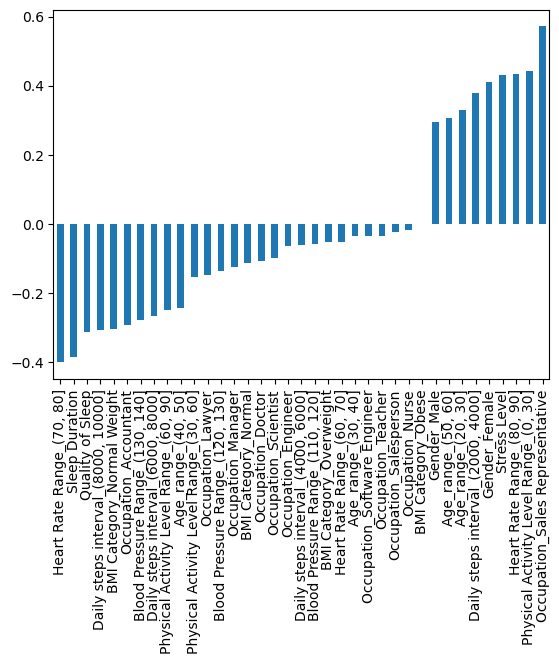

In [131]:
df.corr()["Sleep Disorder"][:-1].sort_values().plot(kind="bar");

In [137]:
list_corr=pd.DataFrame(df.corr()["Sleep Disorder"][:-1].abs().sort_values(ascending=False).nlargest(5)).T.columns

## Creating an evaluation function for our model experiments

In [223]:
#Function to evaluate: accuracy,precision,recall,f1-score
from sklearn.metrics import accuracy_score,precision_recall_fscore_support

def calculate_results(y_true,y_pred):
  #Calculate model accuracy
  model_accuracy=accuracy_score(y_true,y_pred)

  #Calculate model precision,recall and f1-score using "weighted average"
  model_precision,model_recall,model_f1,_=precision_recall_fscore_support(y_true,y_pred,average='weighted',zero_division=0)
  model_results={'accuracy':model_accuracy.round(2)*100,
                 'precision':model_precision.round(2)*100,
                 "recall":model_recall.round(2)*100,
                 "f1":model_f1.round(2)*100}
              
  return model_results

## Creating experiments with the different columns from the Feature Selection Section using ANN

In [142]:
#Splitting the data in train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

In [143]:
#Importing the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [144]:
early=EarlyStopping(monitor="val_accuracy", patience=10)

### Using all the columns

In [152]:
#Creating the model
model_1=Sequential()
model_1.add(Dense(256,activation="relu",input_dim=len(X_train.columns)))
model_1.add(Dense(32,activation="relu"))
model_1.add(Dense(5))
model_1.compile(optimizer="adam",metrics="accuracy",loss=SparseCategoricalCrossentropy(from_logits=True))
history_1=model_1.fit(X_train,y_train,epochs=100,batch_size=32,validation_split=0.2,callbacks=[early])

Epoch 1/100
7/7 [==============================] - 1s 69ms/step - loss: 1.7809 - accuracy: 0.3702 - val_loss: 0.4287 - val_accuracy: 0.9434
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 0.4703 - accuracy: 0.8798 - val_loss: 0.2089 - val_accuracy: 0.9434
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 0.3466 - accuracy: 0.8798 - val_loss: 0.1425 - val_accuracy: 0.9434
Epoch 4/100
7/7 [==============================] - 0s 13ms/step - loss: 0.2362 - accuracy: 0.8798 - val_loss: 0.1307 - val_accuracy: 1.0000
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 0.1861 - accuracy: 0.9712 - val_loss: 0.0893 - val_accuracy: 1.0000
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 0.1466 - accuracy: 0.9808 - val_loss: 0.0690 - val_accuracy: 1.0000
Epoch 7/100
7/7 [==============================] - 0s 13ms/step - loss: 0.1258 - accuracy: 0.9808 - val_loss: 0.0561 - val_accuracy: 1.0000
Epoch 8/100
7/7 [===

In [153]:
#Evaluating the model
model_1.evaluate(X_test,y_test,verbose=0)

[0.023561036214232445, 1.0]

In [225]:
#Making predictions
model_1_pred_probs=model_1.predict(X_test,verbose=0)

#Convert pred probs to classes
model_1_preds=tf.argmax(model_1_pred_probs,axis=1)

#Calculate model_1_results
model_1_results=calculate_results(y_test,
                                  model_1_preds)
model_1_results

{'accuracy': 100.0, 'precision': 100.0, 'recall': 100.0, 'f1': 100.0}

### Using the columns from the Univariable Selection Method

In [154]:
#Creating the model
model_2=Sequential()
model_2.add(Dense(256,activation="relu",input_dim=len(X_train[list_kbest].columns)))
model_2.add(Dense(32,activation="relu"))
model_2.add(Dense(5))
model_2.compile(optimizer="adam",metrics="accuracy",loss=SparseCategoricalCrossentropy(from_logits=True))
history_2=model_2.fit(X_train[list_kbest],y_train,epochs=100,batch_size=32,validation_split=0.2,callbacks=[early])

Epoch 1/100
7/7 [==============================] - 1s 70ms/step - loss: 1.3134 - accuracy: 0.6779 - val_loss: 0.8379 - val_accuracy: 0.9434
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 0.8375 - accuracy: 0.8798 - val_loss: 0.5783 - val_accuracy: 0.9434
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 0.7057 - accuracy: 0.8798 - val_loss: 0.4723 - val_accuracy: 0.9434
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6186 - accuracy: 0.8798 - val_loss: 0.4129 - val_accuracy: 0.9434
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 0.5205 - accuracy: 0.8798 - val_loss: 0.3837 - val_accuracy: 0.9434
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 0.4584 - accuracy: 0.8798 - val_loss: 0.3669 - val_accuracy: 0.9434
Epoch 7/100
7/7 [==============================] - 0s 12ms/step - loss: 0.4071 - accuracy: 0.8798 - val_loss: 0.3225 - val_accuracy: 0.9434
Epoch 8/100
7/7 [===

In [155]:
#Evaluating the model
model_2.evaluate(X_test[list_kbest],y_test,verbose=0)

[0.07203679531812668, 0.982300877571106]

In [227]:
#Making predictions
model_2_pred_probs=model_2.predict(X_test[list_kbest],verbose=0)

#Convert pred probs to classes
model_2_preds=tf.argmax(model_2_pred_probs,axis=1)

#Calculate model_1_results
model_2_results=calculate_results(y_test,
                                  model_2_preds)
model_2_results

{'accuracy': 98.0, 'precision': 99.0, 'recall': 98.0, 'f1': 98.0}

### Using the columns from the Recursive Feature Elimination Method

In [163]:
#Creating the model
model_3=Sequential()
model_3.add(Dense(256,activation="relu",input_dim=len(X_train[list_rfe].columns)))
model_3.add(Dense(32,activation="relu"))
model_3.add(Dense(5))
model_3.compile(optimizer="adam",metrics="accuracy",loss=SparseCategoricalCrossentropy(from_logits=True))
history_3=model_3.fit(X_train[list_rfe],y_train,epochs=100,batch_size=32,validation_split=0.2,callbacks=[early])

Epoch 1/100
7/7 [==============================] - 1s 65ms/step - loss: 1.6335 - accuracy: 0.2692 - val_loss: 1.4580 - val_accuracy: 0.6981
Epoch 2/100
7/7 [==============================] - 0s 16ms/step - loss: 1.3648 - accuracy: 0.9519 - val_loss: 1.2360 - val_accuracy: 1.0000
Epoch 3/100
7/7 [==============================] - 0s 13ms/step - loss: 1.1594 - accuracy: 0.9279 - val_loss: 1.0128 - val_accuracy: 0.9434
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 0.9384 - accuracy: 0.8798 - val_loss: 0.7569 - val_accuracy: 0.9434
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6973 - accuracy: 0.8798 - val_loss: 0.5126 - val_accuracy: 0.9434
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 0.4921 - accuracy: 0.8798 - val_loss: 0.3260 - val_accuracy: 0.9434
Epoch 7/100
7/7 [==============================] - 0s 12ms/step - loss: 0.3505 - accuracy: 0.8798 - val_loss: 0.2151 - val_accuracy: 0.9434
Epoch 8/100
7/7 [===

In [164]:
#Evaluating the model
model_3.evaluate(X_test[list_rfe],y_test,verbose=0)

[0.07114141434431076, 1.0]

In [233]:
#Making predictions
model_3_pred_probs=model_3.predict(X_test[list_rfe],verbose=0)

#Convert pred probs to classes
model_3_preds=tf.argmax(model_3_pred_probs,axis=1)

#Calculate model_1_results
model_3_results=calculate_results(y_test,
                                  model_3_preds)
model_3_results

{'accuracy': 100.0, 'precision': 100.0, 'recall': 100.0, 'f1': 100.0}

### Using the columns from the Correlation Between Features Method

In [166]:
#Creating the model
model_4=Sequential()
model_4.add(Dense(256,activation="relu",input_dim=len(X_train[list_corr].columns)))
model_4.add(Dense(32,activation="relu"))
model_4.add(Dense(5))
model_4.compile(optimizer="adam",metrics="accuracy",loss=SparseCategoricalCrossentropy(from_logits=True))
history_4=model_4.fit(X_train[list_corr],y_train,epochs=100,batch_size=32,validation_split=0.2,callbacks=[early])

Epoch 1/100
7/7 [==============================] - 1s 68ms/step - loss: 1.1943 - accuracy: 0.6202 - val_loss: 0.7929 - val_accuracy: 0.9434
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 0.7383 - accuracy: 0.8798 - val_loss: 0.5346 - val_accuracy: 0.9434
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 0.5711 - accuracy: 0.8798 - val_loss: 0.4213 - val_accuracy: 0.9434
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 0.4982 - accuracy: 0.8798 - val_loss: 0.3697 - val_accuracy: 0.9434
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 0.4548 - accuracy: 0.8798 - val_loss: 0.3396 - val_accuracy: 0.9434
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 0.4243 - accuracy: 0.8798 - val_loss: 0.3255 - val_accuracy: 0.9434
Epoch 7/100
7/7 [==============================] - 0s 12ms/step - loss: 0.3868 - accuracy: 0.8798 - val_loss: 0.3082 - val_accuracy: 0.9434
Epoch 8/100
7/7 [===

In [208]:
#Evaluating the model
model_4.evaluate(X_test[list_corr],y_test,verbose=0)

[0.2133893072605133, 0.9292035102844238]

In [232]:
#Making predictions
model_4_pred_probs=model_4.predict(X_test[list_corr],verbose=0)

#Convert pred probs to classes
model_4_preds=tf.argmax(model_4_pred_probs,axis=1)

#Calculate model_1_results
model_4_results=calculate_results(y_test,
                                  model_4_preds)
model_4_results

{'accuracy': 93.0, 'precision': 86.0, 'recall': 93.0, 'f1': 90.0}

## Feature Importance

### Principal Features from the Decision Tree Classifier Model

In [181]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X,y)
dtc_df=pd.DataFrame(data=dtc.feature_importances_ ,index=X.columns,columns=["Importance"]).sort_values(by="Importance",ascending=False)
list_dtc=dtr_df.nlargest(5,columns="Importance").index

In [182]:
list_dtc

Index(['Physical Activity Level Range_(30, 60]', 'Stress Level',
       'Age_range_(40, 50]', 'Sleep Duration', 'BMI Category_Obese'],
      dtype='object')

### Principal Features from the Random Forest Classifier Model

In [183]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X,y)
rfc_df=pd.DataFrame(data=rfc.feature_importances_ ,index=X.columns,columns=["Importance"]).sort_values(by="Importance",ascending=False)
list_rfc=rfc_df.nlargest(5,columns="Importance").index

In [184]:
list_rfc

Index(['Stress Level', 'Sleep Duration', 'Occupation_Sales Representative',
       'Quality of Sleep', 'Gender_Female'],
      dtype='object')

### Principal Features from the Extra Tree Classifier Model

In [178]:
from sklearn.tree import ExtraTreeClassifier
etc=ExtraTreeClassifier()
etc.fit(X,y)
etc_df=pd.DataFrame(data=etc.feature_importances_ ,index=X.columns,columns=["Importance"]).sort_values(by="Importance",ascending=False)
list_etc=etc_df.nlargest(5,columns="Importance").index

In [179]:
list_etc

Index(['Age_range_(50, 60]', 'Gender_Female',
       'Occupation_Sales Representative',
       'Physical Activity Level Range_(0, 30]', 'Occupation_Engineer'],
      dtype='object')

### Principal Features from the Ada Boost Classifier Model

In [190]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(X,y)
abc_df=pd.DataFrame(data=abc.feature_importances_ ,index=X.columns,columns=["Importance"]).sort_values(by="Importance",ascending=False)
list_abc=abc_df.nlargest(5,columns="Importance").index

In [191]:
list_abc

Index(['Daily steps interval_(8000, 10000]',
       'Daily steps interval_(6000, 8000]',
       'Daily steps interval_(4000, 6000]', 'Stress Level',
       'Daily steps interval_(2000, 4000]'],
      dtype='object')

### Principal Features from the GradientBoosting Classifier Model

In [193]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=AdaBoostClassifier()
gbc.fit(X,y)
gbc_df=pd.DataFrame(data=gbc.feature_importances_ ,index=X.columns,columns=["Importance"]).sort_values(by="Importance",ascending=False)
list_gbc=gbc_df.nlargest(5,columns="Importance").index

In [194]:
list_gbc

Index(['Daily steps interval_(8000, 10000]',
       'Daily steps interval_(6000, 8000]',
       'Daily steps interval_(4000, 6000]', 'Stress Level',
       'Daily steps interval_(2000, 4000]'],
      dtype='object')

## Creating experiments with the different columns from the Feature Importance Section using ANN

### Using the columns from the Decision Tree Classifier Model

In [198]:
#Creating the model
model_5=Sequential()
model_5.add(Dense(256,activation="relu",input_dim=len(X_train[list_dtc].columns)))
model_5.add(Dense(32,activation="relu"))
model_5.add(Dense(5))
model_5.compile(optimizer="adam",metrics="accuracy",loss=SparseCategoricalCrossentropy(from_logits=True))
history_5=model_5.fit(X_train[list_dtc],y_train,epochs=100,batch_size=32,validation_split=0.2,callbacks=[early])

Epoch 1/100
7/7 [==============================] - 1s 68ms/step - loss: 0.6759 - accuracy: 0.8798 - val_loss: 0.3085 - val_accuracy: 0.9434
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 0.4149 - accuracy: 0.8798 - val_loss: 0.2206 - val_accuracy: 0.9434
Epoch 3/100
7/7 [==============================] - 0s 13ms/step - loss: 0.3506 - accuracy: 0.8798 - val_loss: 0.1973 - val_accuracy: 0.9434
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 0.3001 - accuracy: 0.8798 - val_loss: 0.1918 - val_accuracy: 0.9434
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 0.2708 - accuracy: 0.8798 - val_loss: 0.1802 - val_accuracy: 0.9434
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 0.2494 - accuracy: 0.8798 - val_loss: 0.1596 - val_accuracy: 0.9434
Epoch 7/100
7/7 [==============================] - 0s 12ms/step - loss: 0.2286 - accuracy: 0.8798 - val_loss: 0.1380 - val_accuracy: 0.9434
Epoch 8/100
7/7 [===

In [199]:
#Evaluating the model
model_5.evaluate(X_test[list_dtc],y_test,verbose=0)

[0.1349998265504837, 1.0]

In [234]:
#Making predictions
model_5_pred_probs=model_5.predict(X_test[list_dtc],verbose=0)

#Convert pred probs to classes
model_5_preds=tf.argmax(model_5_pred_probs,axis=1)

#Calculate model_1_results
model_5_results=calculate_results(y_test,
                                  model_5_preds)
model_5_results

{'accuracy': 100.0, 'precision': 100.0, 'recall': 100.0, 'f1': 100.0}

### Using the columns from the Random Forest Classifier Model

In [200]:
#Creating the model
model_6=Sequential()
model_6.add(Dense(256,activation="relu",input_dim=len(X_train[list_rfc].columns)))
model_6.add(Dense(32,activation="relu"))
model_6.add(Dense(5))
model_6.compile(optimizer="adam",metrics="accuracy",loss=SparseCategoricalCrossentropy(from_logits=True))
history_6=model_6.fit(X_train[list_rfc],y_train,epochs=100,batch_size=32,validation_split=0.2,callbacks=[early])

Epoch 1/100
7/7 [==============================] - 1s 75ms/step - loss: 1.3252 - accuracy: 0.5192 - val_loss: 0.4610 - val_accuracy: 0.9434
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 0.5405 - accuracy: 0.8798 - val_loss: 0.2619 - val_accuracy: 0.9434
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 0.4388 - accuracy: 0.8798 - val_loss: 0.1899 - val_accuracy: 0.9434
Epoch 4/100
7/7 [==============================] - 0s 13ms/step - loss: 0.3216 - accuracy: 0.8798 - val_loss: 0.1766 - val_accuracy: 0.9434
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 0.2628 - accuracy: 0.8798 - val_loss: 0.1697 - val_accuracy: 0.9434
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 0.2377 - accuracy: 0.8798 - val_loss: 0.1292 - val_accuracy: 0.9434
Epoch 7/100
7/7 [==============================] - 0s 12ms/step - loss: 0.2264 - accuracy: 0.8798 - val_loss: 0.1096 - val_accuracy: 0.9434
Epoch 8/100
7/7 [===

In [201]:
#Evaluating the model
model_6.evaluate(X_test[list_rfc],y_test,verbose=0)

[0.09162521362304688, 0.982300877571106]

In [235]:
#Making predictions
model_6_pred_probs=model_6.predict(X_test[list_rfc],verbose=0)

#Convert pred probs to classes
model_6_preds=tf.argmax(model_6_pred_probs,axis=1)

#Calculate model_1_results
model_6_results=calculate_results(y_test,
                                  model_6_preds)
model_6_results

{'accuracy': 98.0, 'precision': 99.0, 'recall': 98.0, 'f1': 98.0}

### Using the columns from the Extra Trees Classifier Model

In [209]:
#Creating the model
model_7=Sequential()
model_7.add(Dense(256,activation="relu",input_dim=len(X_train[list_etc].columns)))
model_7.add(Dense(32,activation="relu"))
model_7.add(Dense(5))
model_7.compile(optimizer="adam",metrics="accuracy",loss=SparseCategoricalCrossentropy(from_logits=True))
history_7=model_7.fit(X_train[list_etc],y_train,epochs=100,batch_size=32,validation_split=0.2,callbacks=[early])

Epoch 1/100
7/7 [==============================] - 1s 67ms/step - loss: 1.5568 - accuracy: 0.5192 - val_loss: 1.4699 - val_accuracy: 0.7547
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 1.4069 - accuracy: 0.8221 - val_loss: 1.3190 - val_accuracy: 0.9057
Epoch 3/100
7/7 [==============================] - 0s 13ms/step - loss: 1.2541 - accuracy: 0.8654 - val_loss: 1.1394 - val_accuracy: 0.9434
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 1.0869 - accuracy: 0.8798 - val_loss: 0.9430 - val_accuracy: 0.9434
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 0.9130 - accuracy: 0.8798 - val_loss: 0.7540 - val_accuracy: 0.9434
Epoch 6/100
7/7 [==============================] - 0s 13ms/step - loss: 0.7500 - accuracy: 0.8798 - val_loss: 0.5865 - val_accuracy: 0.9434
Epoch 7/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6018 - accuracy: 0.8798 - val_loss: 0.4566 - val_accuracy: 0.9434
Epoch 8/100
7/7 [===

In [210]:
#Evaluating the model
model_7.evaluate(X_test[list_etc],y_test,verbose=0)

[0.05321695655584335, 1.0]

In [236]:
#Making predictions
model_7_pred_probs=model_7.predict(X_test[list_etc],verbose=0)

#Convert pred probs to classes
model_7_preds=tf.argmax(model_7_pred_probs,axis=1)

#Calculate model_1_results
model_7_results=calculate_results(y_test,
                                  model_7_preds)
model_7_results

{'accuracy': 100.0, 'precision': 100.0, 'recall': 100.0, 'f1': 100.0}

### Using the columns from the Ada Boost Classifier Model

In [211]:
#Creating the model
model_8=Sequential()
model_8.add(Dense(256,activation="relu",input_dim=len(X_train[list_abc].columns)))
model_8.add(Dense(32,activation="relu"))
model_8.add(Dense(5))
model_8.compile(optimizer="adam",metrics="accuracy",loss=SparseCategoricalCrossentropy(from_logits=True))
history_8=model_8.fit(X_train[list_abc],y_train,epochs=100,batch_size=32,validation_split=0.2,callbacks=[early])

Epoch 1/100
7/7 [==============================] - 1s 67ms/step - loss: 1.3151 - accuracy: 0.5673 - val_loss: 0.8743 - val_accuracy: 0.9434
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 0.8618 - accuracy: 0.8798 - val_loss: 0.6236 - val_accuracy: 0.9434
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 0.7090 - accuracy: 0.8798 - val_loss: 0.5034 - val_accuracy: 0.9434
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6296 - accuracy: 0.8798 - val_loss: 0.4331 - val_accuracy: 0.9434
Epoch 5/100
7/7 [==============================] - 0s 11ms/step - loss: 0.5647 - accuracy: 0.8798 - val_loss: 0.3929 - val_accuracy: 0.9434
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 0.5010 - accuracy: 0.8798 - val_loss: 0.3689 - val_accuracy: 0.9434
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 0.4474 - accuracy: 0.8798 - val_loss: 0.3486 - val_accuracy: 0.9434
Epoch 8/100
7/7 [===

In [212]:
#Evaluating the model
model_8.evaluate(X_test[list_abc],y_test,verbose=0)

[0.21979016065597534, 0.9292035102844238]

In [237]:
#Making predictions
model_8_pred_probs=model_8.predict(X_test[list_abc],verbose=0)

#Convert pred probs to classes
model_8_preds=tf.argmax(model_8_pred_probs,axis=1)

#Calculate model_1_results
model_8_results=calculate_results(y_test,
                                  model_8_preds)
model_8_results

{'accuracy': 93.0, 'precision': 86.0, 'recall': 93.0, 'f1': 90.0}

### Using the columns from the Gradient Boosting Classifier Model

In [213]:
#Creating the model
model_9=Sequential()
model_9.add(Dense(256,activation="relu",input_dim=len(X_train[list_gbc].columns)))
model_9.add(Dense(32,activation="relu"))
model_9.add(Dense(5))
model_9.compile(optimizer="adam",metrics="accuracy",loss=SparseCategoricalCrossentropy(from_logits=True))
history_9=model_9.fit(X_train[list_gbc],y_train,epochs=100,batch_size=32,validation_split=0.2,callbacks=[early])

Epoch 1/100
7/7 [==============================] - 1s 67ms/step - loss: 1.1191 - accuracy: 0.6106 - val_loss: 0.7720 - val_accuracy: 0.9434
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6977 - accuracy: 0.8798 - val_loss: 0.5145 - val_accuracy: 0.9434
Epoch 3/100
7/7 [==============================] - 0s 13ms/step - loss: 0.5427 - accuracy: 0.8798 - val_loss: 0.4049 - val_accuracy: 0.9434
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 0.4872 - accuracy: 0.8798 - val_loss: 0.3556 - val_accuracy: 0.9434
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 0.4503 - accuracy: 0.8798 - val_loss: 0.3397 - val_accuracy: 0.9434
Epoch 6/100
7/7 [==============================] - 0s 13ms/step - loss: 0.4202 - accuracy: 0.8798 - val_loss: 0.3285 - val_accuracy: 0.9434
Epoch 7/100
7/7 [==============================] - 0s 12ms/step - loss: 0.3981 - accuracy: 0.8798 - val_loss: 0.3086 - val_accuracy: 0.9434
Epoch 8/100
7/7 [===

In [214]:
#Evaluating the model
model_9.evaluate(X_test[list_gbc],y_test,verbose=0)

[0.2322789430618286, 0.9292035102844238]

In [238]:
#Making predictions
model_9_pred_probs=model_9.predict(X_test[list_gbc],verbose=0)

#Convert pred probs to classes
model_9_preds=tf.argmax(model_9_pred_probs,axis=1)

#Calculate model_1_results
model_9_results=calculate_results(y_test,
                                  model_9_preds)
model_9_results

{'accuracy': 93.0, 'precision': 86.0, 'recall': 93.0, 'f1': 90.0}

## Comparing the performance of each of our models

In [239]:
#Combining model results into a DataFrame
all_model_results=pd.DataFrame({
                                "Model 1: All Columns ":model_1_results,
                                "Model 2: Univariable Selection":model_2_results,
                                "Model 3: Recursive Feature Elimination":model_3_results,
                                "Model 4: Correlation Between Features":model_4_results,
                                "Model 5: Decision Tree Classifier Model - Features":model_5_results,
                                "Model 6: Random Forest Classifier Model - Features":model_6_results,
                                "Model 7: Extra Trees Classifier Model - Features":model_7_results,
                                "Model 8: Ada Boost Classifier Model - Features":model_8_results,
                                "Model 9: Gradient Boosting Trees Classifier Model - Features":model_9_results}
)
 
all_model_results=all_model_results.T

all_model_results

,accuracy,precision,recall,f1
Model 1: All Columns,100.00,100.00,100.00,100.00
Model 2: Univariable Selection,98.00,99.00,98.00,98.00
Model 3: Recursive Feature Elimination,100.00,100.00,100.00,100.00
Model 4: Correlation Between Features,93.00,86.00,93.00,90.00
Model 5: Decision Tree Classifier Model - Features,100.00,100.00,100.00,100.00
Model 6: Random Forest Classifier Model - Features,98.00,99.00,98.00,98.00
Model 7: Extra Trees Classifier Model - Features,100.00,100.00,100.00,100.00
Model 8: Ada Boost Classifier Model - Features,93.00,86.00,93.00,90.00
Model 9: Gradient Boosting Trees Classifier Model - Features,93.00,86.00,93.00,90.00


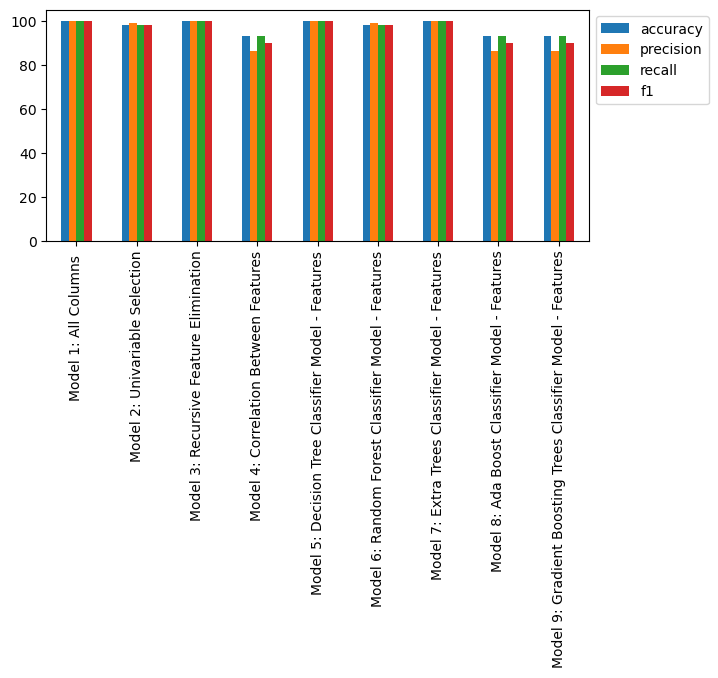

In [240]:
#Plot and compare all of the model results
all_model_results.plot(kind='bar',figsize=(7,3)).legend(bbox_to_anchor=(1,1));